![WeTheGeeksV3.jpg](https://raw.githubusercontent.com/ptsireunion/CPGE-PT-Reunion/main/WeTheGeeksV3.jpg)
 
<div class="alert alert-block alert-info">
    <b> PYTHON – Travaux Dirigés N°1 
</div>

# - ETUDE DE LA METHODE D'EULER EXPLICITE -
>Physique Chimie `CPGE PT` T.Roque
    >> lien vers le blog <a> https://cpge-reunion-ptsi.blogspot.com/p/python.html </a>
       

Dans ce notebook, on rappelle le principe de la `méthode d'Euler explicite` pour pour intégrer une équation différentielle dont on se limite pour le moment au premier ordre. On verra plus tard, avec la `méthode d'Euler implicite`comment transformer une équation différentielle d'ordre 2 en 2 équations différentielles d'ordre 1.

<div class="alert alert-block alert-danger">
    <b> PREMIERE PARTIE, BASES THEORIQUES
</div>


La méthode d'Euler est la base de tout méthode d'intégration numérique d'équation différentielle.C'est une méthode d'intégration numérique rudimentaire et simple à mettre en œuvre. Il est donc important de la maîtriser avant d'explorer des situations plus complexes.
### Rappel de la méthode 
La méthode d'Euler explicite sert à intégrer une équation différentielle du premier ordre du type :
$$
\frac{\mathrm{d}y}{\mathrm{d}t} = f(y(t), t) 
$$
avec une condition de type $$y(0)=y_{0}$$
où $f$ est une fonction qui dépend à la fois de la fonction inconnue $y(t)$ et de la variable temporelle $t$. 
La procédure consiste à interpréter la dérivée $\frac{\mathrm{d}y}{\mathrm{d}t}$ comme le rapport de la variation infinitésimale $\mathrm{d}y$ de la grandeur $y$ pendant la durée infinitéimale $\mathrm{d}t$. L'équation différentielle se réécrit alors, si on multiplie par $\mathrm{d}t$ de part et d'autre,
$$
\mathrm{d}y \approx f(y(t), t)\,\mathrm{d}t
$$
et la nouvelle valeur de $y$ en $t+\mathrm{d}t$ correspond à peu près à celle en $t$ à laquelle on ajoute $\mathrm{d}y$:
$$
y(t + \mathrm{d}t) = y(t) + \mathrm{d}y 
    \approx y(t) + f(y(t), t)\,\mathrm{d}t
$$
Pour avancer dans le temps, il suffira d'y aller par "pas" temporel de durée $\mathrm{d}t$ et de calculer l'évolution de $y$ de proche en proche en utilisant à chaque fois la dernière valeur connue de $y$ au "rang précédent n" en $t$, ou encore "$y_n$ en $ t_n$" pour calculer la suivante, au "rang suivant", en $t + \mathrm{d}t$, ou encore "$y_{n+1}$ en $t_{n+1}$". On pourra alors percevoir l'équation approchée précédente comme une `équation de récurrence` :  $y_{n+1}=y(t_n)+f(y(t_n),t).dt=y_{n}+f(y_n,t).dt$
 
<div class="alert alert-block alert-warning">
     <b>Remarque : on utilise souvent la variable $t$ pour étudier l'évolution de fonctions comme $y$ au cours du temps, mais rien n'empêche d'avoir une autre variable comme l'altitude z dans l'équation de l'hydrostatique dans le cas d'une atmosphère avec évolution affine de la température et dans le modèle du gaz parfait. On aurait alors à appliquer Euler à :
$$
\frac{\mathrm{d}P}{\mathrm{d}z} = f(P, z)= -\frac{P(z).M}{R.T_{0}.(1-a.z)}
$$
</div>


<div class="alert alert-block alert-danger">
    <b> EXEMPLE DE LA DECHARGE D'UN CONDENSATEUR
</div>

![RC.gif](https://raw.githubusercontent.com/ptsireunion/CPGE-PT-Reunion/554e0ed3a1cdf9bd97a437bb94f30185b3987717/RC.gif)


Supposons que E=10v et que l'interrupteur K est en position 1 depuis longtemps. A t=0, on le bascule en position 2, démontrer que $\frac{\mathrm{d}y}{\mathrm{d}t} = - \frac1\tau\,y$ avec $y(0) = 10$ et $\tau=R.C$. Résoudre l'équation de façon exacte. 

Si on choisit de trouver une solution numérique approchée avec la méthode d'Euler, on remarque que ici, on a simplement $f(y, t) = - \frac1\tau\,y$.
Il nous reste à : 
>- choisir $\mathrm{d}t$ suffisamment petit pour que les erreurs successives ne soient pas trop grandes 
>- stocker les valeurs des temps successifs et des valeurs correspondantes calculées de $y$ avec l'équation de récurrence
>- faire la représentation graphique et la comparer à la solution analytique exacte de l'équation différentielle 


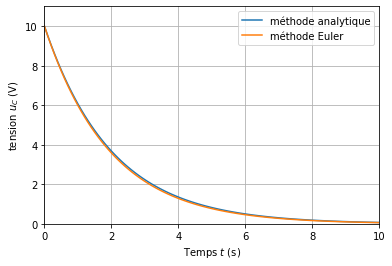

In [1]:
import numpy as np              # Pour utiliser des tableaux
import matplotlib.pyplot as plt # Pour faire les courbes à la fin

dt = 1e-1
t0 = 0
y0 = 10
tau= 2
tmax = 5 * tau # On va intégrer jusqu'à 5\tau
N = int((tmax-t0) / dt) # Pour savoir le nombre de places à prévoir

# On prépare les contenants qui stockeront les valeurs calculées
# le "+1" correspond à la valeur initiale
T = np.zeros(N+1)
Y = np.zeros(N+1)

# On impose les valeurs initiales
T[0] = t0
Y[0] = y0

def f(y, t):
    """
    La fonction en question ne dépend que de y,
    mais ce sera plus facile à généraliser quand on aura
    un second membre non constant dans les prochains épisodes.
    En outre, informatiquement, il n'est pas abhérent de demander
    une variable (ici t) et finalement ne pas l'utiliser si cela
    simplifie une généralisation future.
    """
    return - 1 / tau * y

# La boucle de calcul proprement dite dans laquel chaque Y est calculé
# à partir de celui d'avant.
for i in range(1, N+1):
    # On utilise les valeurs précédentes pour calculer l'incrément
    dy = f(Y[i-1], T[i-1]) * dt
    # et on le rajoute à la valeur précédente pour avoir la nouvelle
    Y[i] = Y[i-1] + dy 
    # Le temps s'incrémente aussi d'un pas
    T[i] = T[i-1] + dt 

# On peut à présent représenter notre solution ainsi que la solution
# connue du cours en y0 * exp(-t/tau)

theorique = y0 * np.exp(-T / tau)
plt.plot(T, theorique, label = 'méthode analytique')
plt.plot(T, Y, label = 'méthode Euler')
plt.xlabel('Temps $t$ (s)')
plt.ylabel('tension $u_C$ (V)')
plt.xlim(t0, tmax)
plt.ylim(0, 1.1*y0)
plt.grid()
plt.legend()


On voit qu'avec ce pas de temps, les deux versions sont très proches, même si on voit une différence entre 1 et 5 secondes qui montre que l'intégration par Euler a tendance à surestimer la baisse de $y$, mais dans l'ensemble, c'est acceptable d'autant qu'on tend vers une constante (ici nulle).

<div class="alert alert-block alert-danger">
    <b> A VOUS DE CODER : CHARGE DU CONDENSATEUR
</div>

Supposons le condensateur déchargé et basculons l'interrupteur en position 1. Démontrer que :
$$
\frac{\mathrm{d}y}{\mathrm{d}t} + \frac{1}\tau\,y = \frac{E}{\tau}
$$
avec la condition initiale $y(0) = 0$.

On impose les valeurs de `dt`,  `tmax`, `tau` et `E`. À vous d'adapter de terminer le code
Vous mettrez dans la variable `reponse` (SANS ACCENT) à la fois la valeur de $y$ en $t=t_0 + \tau$ et $t=t_0 + 5\tau$.

In [ ]:
import numpy as np              # Pour avoir des np.array
import matplotlib.pyplot as plt # Pour faire les courbes à la fin
E=10
tau=5
tmax=25
dt=0.01
t0 = 0
y0 = 0
N = int((tmax-t0) / dt) # Pour savoir le nombre de places à prévoir
...
...
...
...

>- Superposez sur la même courbe différentes charges avec des $\tau$ différents
>- Réalisez une charge à 10Volts alors que le condensateur est encore chargé, au temps initial, à 1 Volt
>- Recommencez l'exercice en utilisant des listes plutôt que des tableaux